# **Proyecto 1 - Inteligencia Artificial**

Adriana Palacios 23044
Bryan Martínez 23542

---

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.preprocessing import FunctionTransformer

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, make_scorer

from xgboost import XGBRegressor

from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from xgboost.callback import EarlyStopping

import pickle

## **Exploración y Comprensión de los Datos**

In [3]:
# features and target variables
features_path = "datasets/training_features.csv"
target_path = "datasets/training_target.csv"

features = pd.read_csv(features_path)
target = pd.read_csv(target_path).iloc[:, 0]

### **Inspección de Dimensiones del Dataset**

In [4]:
features.shape
target.shape

print("Dimensiones features:", features.shape)
print("Dimensiones target:", target.shape)

Dimensiones features: (2344, 79)
Dimensiones target: (2344,)


El dataset cuenta con 2344 observaciones y 80 variables.

### **Tipos de Variables, Identificación y Valores Faltantes**


| Variable        | Tipo       | Subtipo  | ¿Qué es?                                                        | ¿Hay valores faltantes? |
| --------------- | ---------- | -------- | --------------------------------------------------------------- | ---------------------- |
| MS SubClass     | Categórica | Nominal  | Los números representan el tipo de vivienda.                    | No                     |
| MS Zoning       | Categórica | Nominal  | Identifica el tipo de zona.                                     | No                     |
| Lot Frontage    | Numérica   | Continua | Mide cuánto mide el frente del terreno del lado de la calle.    | Sí                     |
| Lot Area        | Numérica   | Continua | Tamaño del lote.                                                | No                     |
| Street          | Categórica | Nominal  | Tipo de carretera que da a la propiedad.                        | No                     |
| Alley           | Categórica | Nominal  | Tipo de callejón que da a la propiedad.                         | Sí                     |
| Lot Shape       | Categórica | Ordinal  | Forma de la propiedad.                                          | No                     |
| Land Contour    | Categórica | Nominal  | Qué tan plana es la propiedad.                                  | No                     |
| Utilities       | Categórica | Nominal  | Tipos de utilidades disponibles en la propiedad.                | No                     |
| Lot Config      | Categórica | Nominal  | Exposición del terreno a calles.                                | No                     |
| Land Slope      | Categórica | Ordinal  | Inclinación de la propiedad                                     | No                     |
| Neighborhod     | Categórica | Nominal  | Vecindario en la que está.                                      | No                     |
| Condition 1     | Categórica | Nominal  | Proximidad a algunas condiciones.                               | No                     |
| Condition 2     | Categórica | Nominal  | Proximidad a condiciones (más de 1 está presente).              | No                     |
| Bldg Type       | Categórica | Nominal  | Tipo de vivienda.                                               | No                     |
| House Style     | Categórica | Nominal  | Estilo de la vivienda (niveles, estado de estos).               | No                     |
| Overall Qual    | Categórica | Ordinal  | Calificación del material y acabados de la casa.                | No                     |
| Overall Cond    | Categórica | Ordinal  | Calificación de la condición de la casa.                        | No                     |
| Year Built      | Numérica   | Discreta | Fecha de construcción original                                  | No                     |
| Year Remod/Add  | Numérica   | Discreta | Fecha de remodelación, si no hubo, es la original               | No                     |
| Roof Style      | Categórica | Nominal  | Tipo de techo                                                   | No                     |
| Roof Matl       | Categórica | Nominal  | Material del techo.                                             | No                     |
| Exterior 1st    | Categórica | Nominal  | Cubierta exterior de la casa.                                   | No                     |
| Exterior 2nd    | Categórica | Nominal  | Cubierta exterior de la casa, si es que hay más de un material. | No                     |
| Mas Vnr Type    | Categórica | Nominal  | Tipo de revestimiento de mampostería.                           | Sí                     |
| Mas Vnr Area    | Numérica   | Continua | Área de mampostería.                                            | Sí                     |
| Exter Qual      | Categórica | Ordinal  | Calidad del material en el exterior.                            | No                     |
| Exter Cond      | Categórica | Ordinal  | Evalúa la condición del material en el exterior.                | No                     |
| Foundation      | Categórica | Nominal  | Tipo de base de la casa.                                        | No                     |
| Bsmt Qual       | Categórica | Ordinal  | Evalúa la altura del sótano.                                    | Sí                     |
| Bmst Cond       | Categórica | Ordinal  | Evalúa la calidad general del sótano.                           | Sí                     |
| Bmst Exposure   | Categórica | Ordinal  | Exposición del sótano.                                          | Sí                     |
| BmstFin Type 1  | Categórica | Nominal  | Calificación del área principal.                                | Sí                     |
| BsmtFin SF 1    | Numérica   | Continua | Tamaño de zona 1.                                               | Sí                     |
| BsmtFin Type 2  | Categórica | Nominal  | Calificación de segunda área del sótano.                        | Sí                     |
| BsmtFin SF 2    | Numérica   | Continua | Pies cuadrados terminados de segunda área.                      | Sí                     |
| Bsmt Unf SF     | Numérica   | Continua | Medida de área sin terminar del sótano.                         | Sí                     |
| Total Bsmt SF   | Numérica   | Continua | Área total del sótano.                                          | Sí                     |
| Heating         | Categórica | Nominal  | Tipo de calentamiento en la vivienda.                           | No                     |
| HetingQC        | Categórica | Ordinal  | Calidad y condición del calientamiento.                         | No                     |
| Central Air     | Categórica | Nominal  | Si tiene aire acondicionado.                                    | No                     |
| Electrical      | Categórica | Nominal  | Sistema eléctrico                                               | No                     |
| 1sr Flr SF      | Numérica   | Continua | Área del primer nivel.                                          | No                     |
| 2nd Flr SF      | Numérica   | Continua | Área del segundo nivel.                                         | No                     |
| Low Qual Fin SF | Numérica   | Continua | Área de baja calidad en todos los niveles.                      | No                     |
| Gr Liv Area     | Numérica   | Continua | Área arriba de la tierra.                                       | No                     |
| Bsmt Full Bath  | Numérica   | Discreta | Cantidad de baños completos en el sotáno.                       | Sí                     |
| Bsmt Half Bath  | Numérica   | Discreta | Cantidad de baños a la mitad.                                   | Sí                     |
| Full Bath       | Numérica   | Discreta | Cantidad de baños completos en la casa.                         | No                     |
| Half Bath       | Numérica   | Discreta | Cantidad de baños a la mitad.                                   | No                     |
| Bedroom AbvGr   | Númerica   | Discreta | Dormitorios dentro de la vivienda.                              | No                     |
| Kitchen AbvGr   | Numérica   | Discreta | Cantidad de cocinas dentro de la vivienda.                      | No                     |
| Kitchen Qual    | Categórica | Ordinal  | Calidad de la cocina.                                           | No                     |
| TotRmsAbvGrd    | Numérica   | Discreta | Cantidad de cuartos dentro de la vivienda.                      | No                     |
| Functional      | Categórica | Ordinal  | Nivel de funcionalidad de la casa.                              | No                     |
| Fireplaces      | Numérica   | Discreta | Número de chimeneas.                                            | No                     |
| Fireplace Qu    | Categórica | Ordinal  | Calidad de la chimenea.                                         | Sí                     |
| Garage Type     | Categórica | Nominal  | Tipos de garage.                                                | Sí                     |
| Garage Yr Blt   | Numérica   | Discreta | Año en que se construyó el garage.                              | Sí                     |
| Garage Finish   | Categórica | Ordinal  | Cómo se encuentra el interior del garage.                       | Sí                     |
| Garage Cars     | Numérica   | Discreta | Capacidad de carros.                                            | Sí                     |
| Garage Area     | Numérica   | Continua | Área del garage.                                                | Sí                     |
| Garage Qual     | Categórica | Ordinal  | Calidad del garage.                                             | Sí                     |
| Garage Cond     | Categórica | Ordinal  | Condición en la que se encuentra el garage.                     | Sí                     |
| Paved Drive     | Categórica | Ordinal  | Qué tan pavimentada está la entrada.                            | No                     |
| Wood Deck SF    | Numérica   | Continua | Área de cubierta de madera.                                     | No                     |
| Open Porch SF   | Numérica   | Continua | Área de porche abierto.                                         | No                     |
| Enclosed Porch  | Numérica   | Continua | Área de porche cerrado.                                         | No                     |
| 3-Sssn Porch    | Numérica   | Continua | Área de un porche de tres temporadas.                           | No                     |
| Screen Porch    | Numérica   | Continua | Área con porche de mosquitero.                                  | No                     |
| Pool Area       | Numérica   | Continua | Área de la piscina.                                             | No                     |
| Pool QC         | Categórica | Ordinal  | Calidad de la piscina.                                          | Sí                     |
| Fence           | Categórica | Ordinal  | Calidad de la cerca.                                            | Sí                     |
| Misc Feature    | Categórica | Nominal  | Indica si la propiedad tiene alguna característica adicional.   | Sí                     |
| Misc Val        | Numérica   | Continua | Valor de la característica adicional.                           | Sí                     |
| Mo Sold         | Numérica   | Discreta | Mes en que se vendió.                                           | No                     |
| Yr Sold         | Numérica   | Discreta | Año en que se vendió.                                           | No                     |
| Sale Type       | Categórica | Nominal  | Tipo de acuerdo en el que se vendió la casa.                    | No                     |
| Sale Condition  | Categórica | Nominal  | Condición de la venta.                                          | No                     |
| Sale Price      | Numérica   | Continua | Precio de venta.                                                | No                     |


### **Análisis Preliminar de Distribuciones y Posibles Outliers**

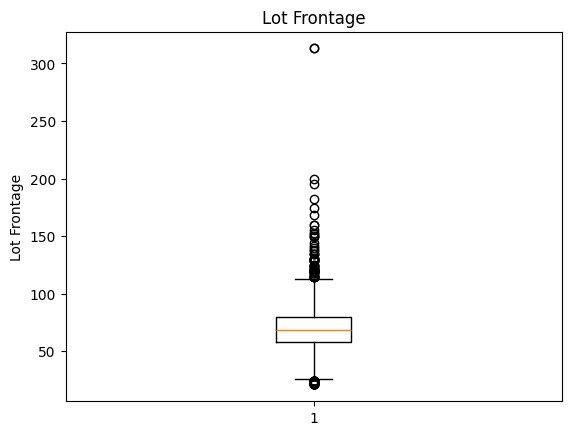

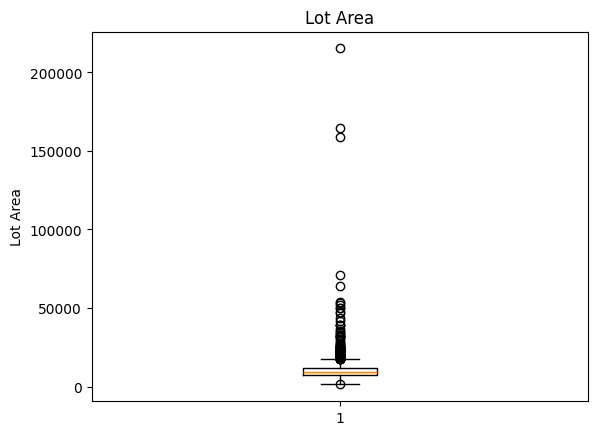

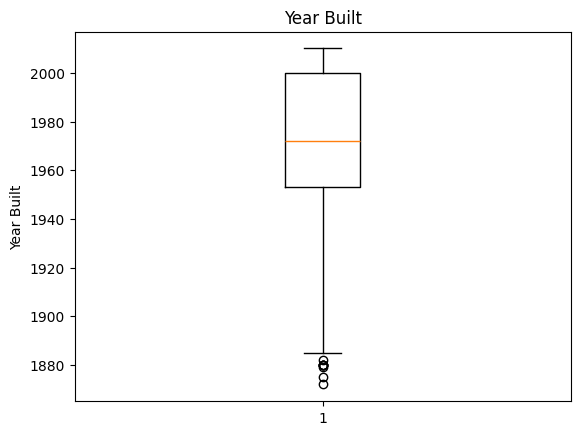

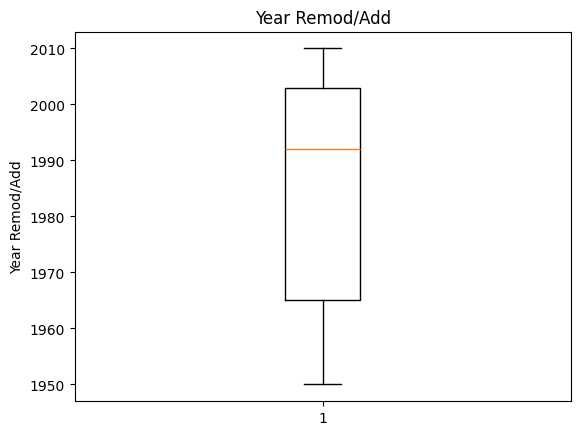

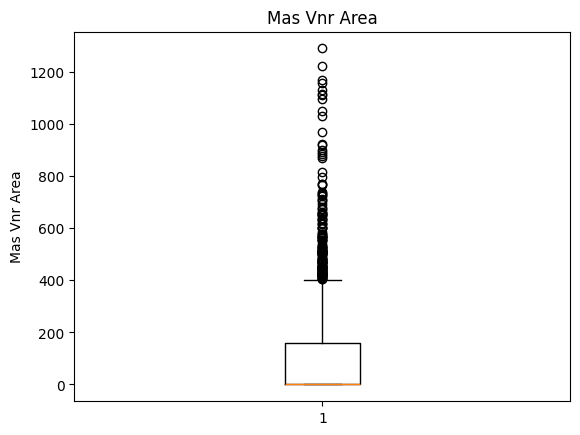

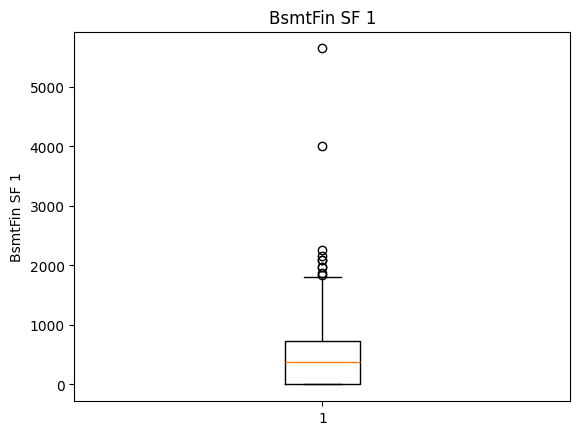

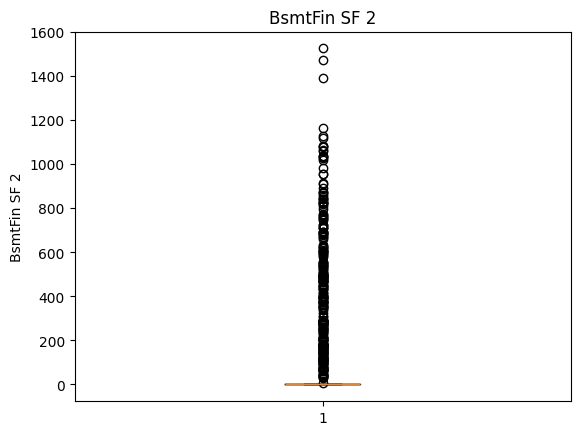

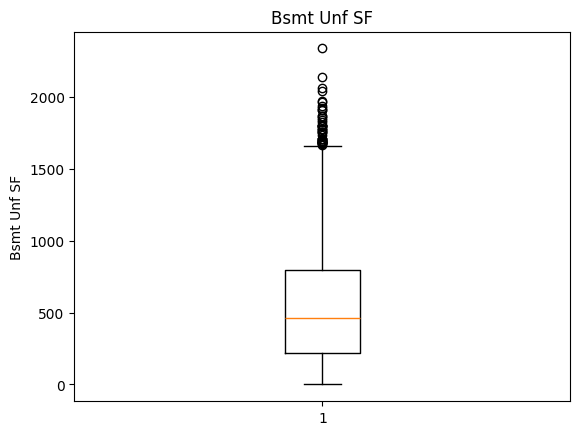

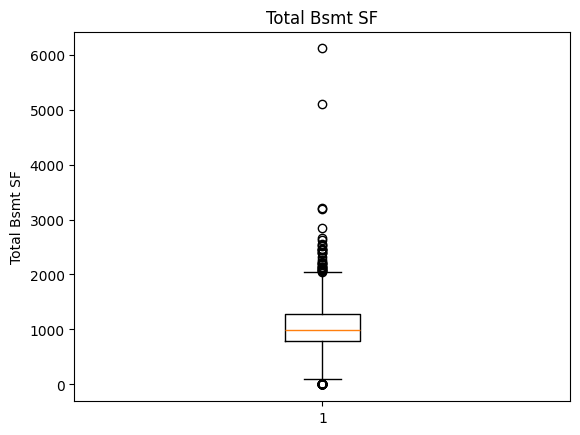

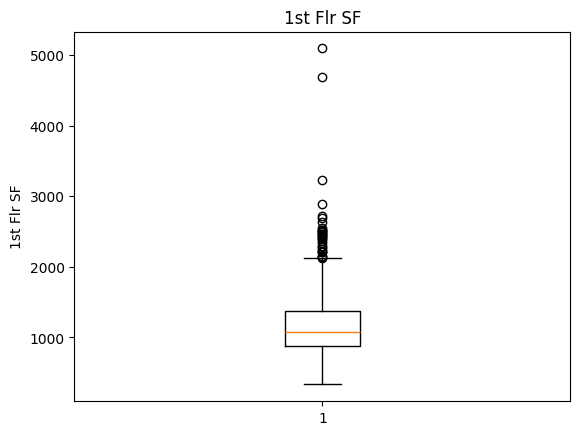

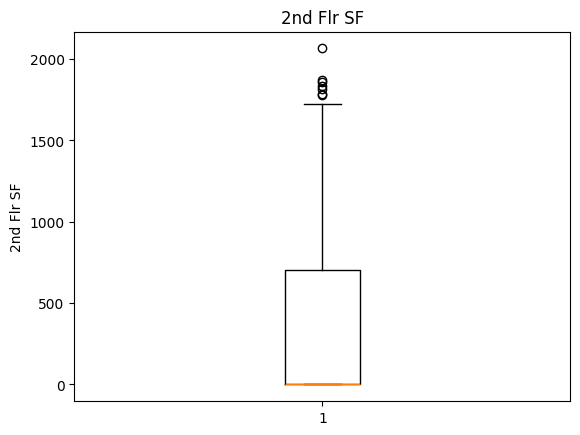

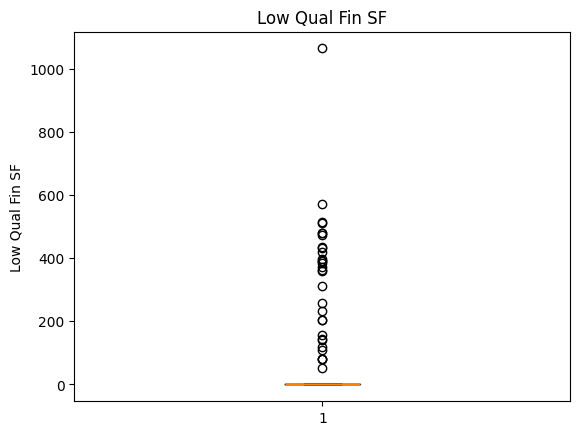

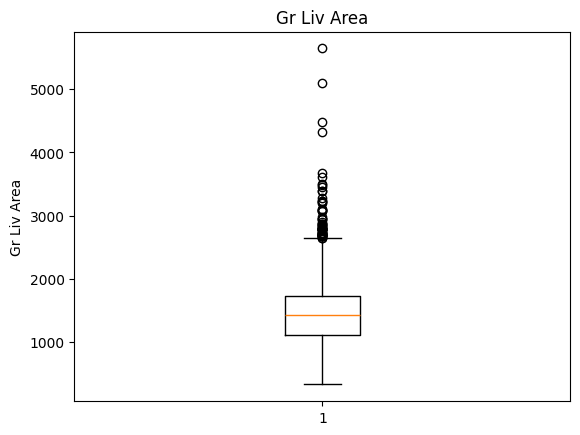

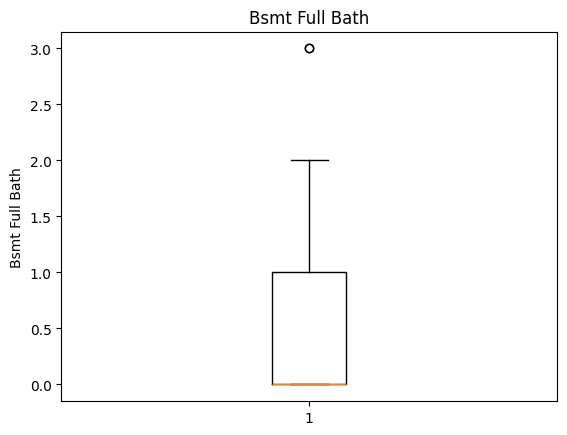

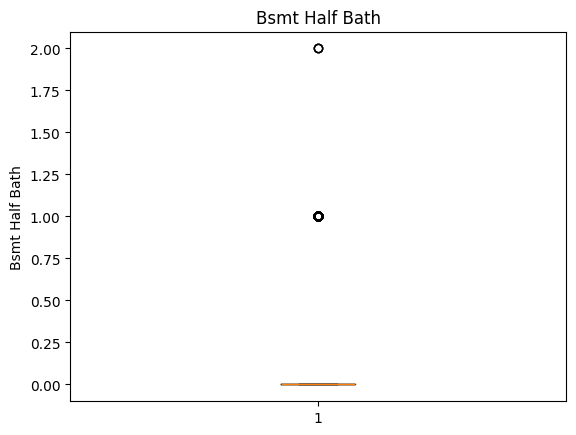

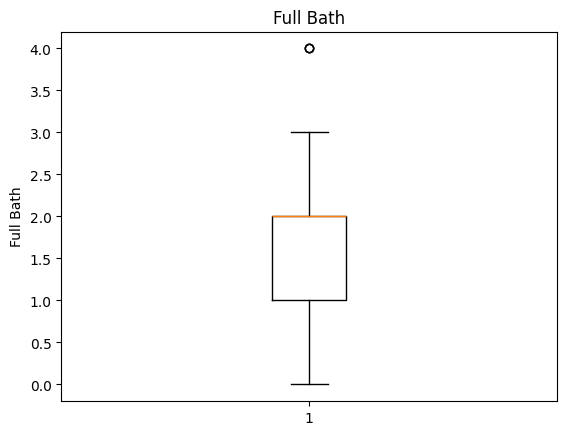

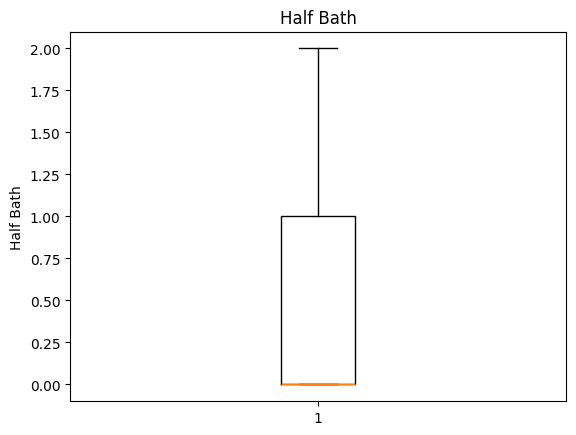

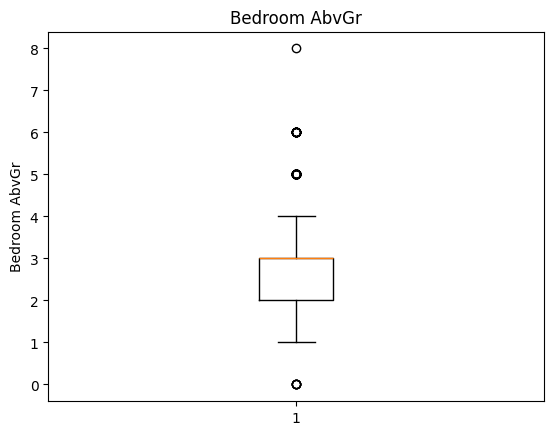

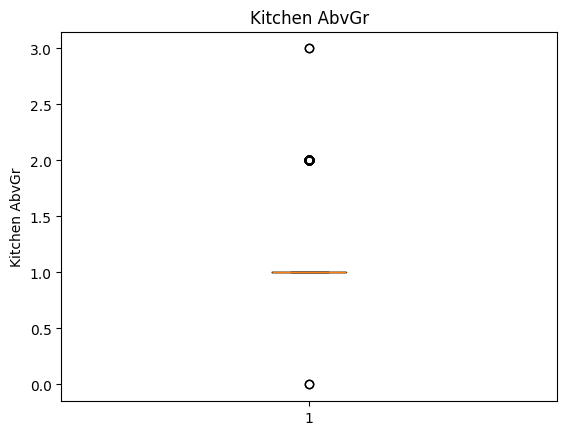

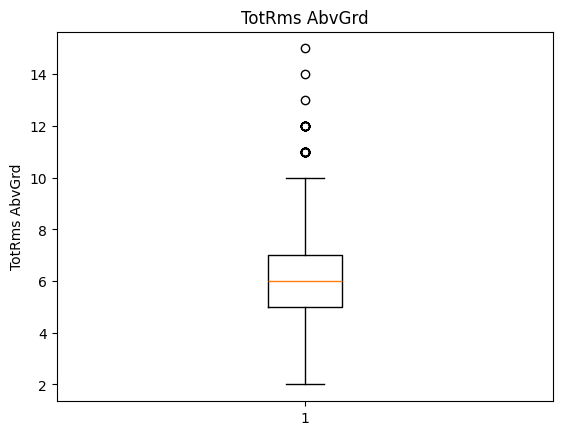

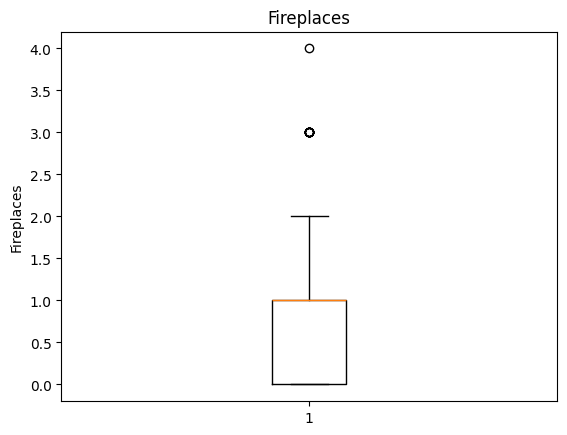

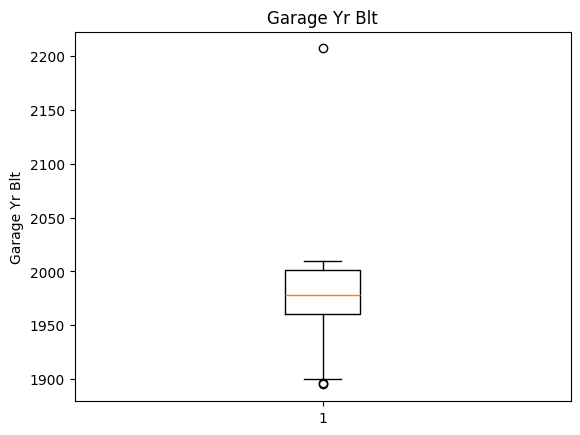

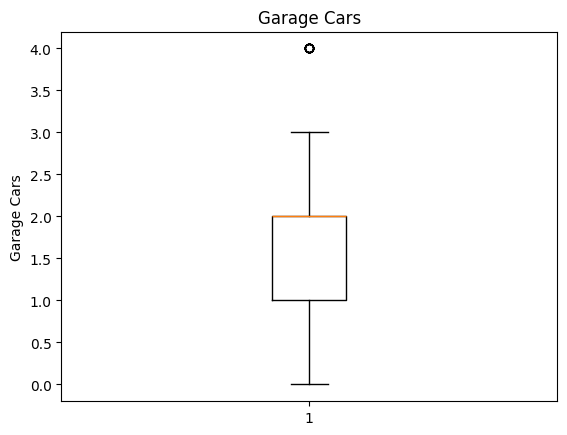

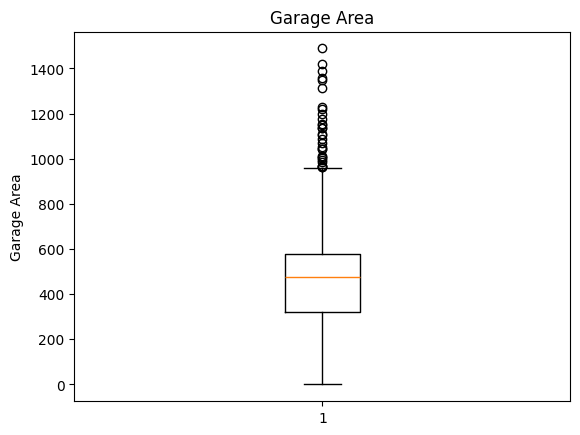

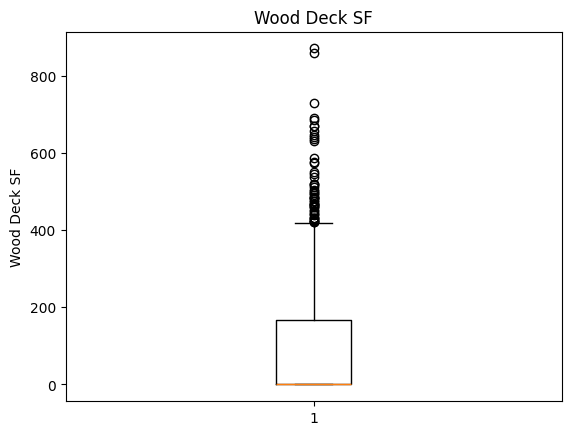

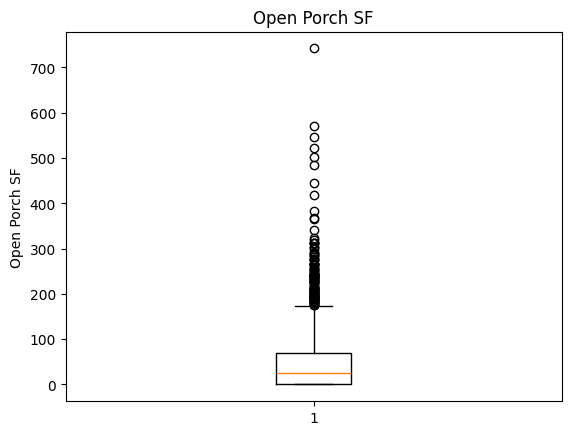

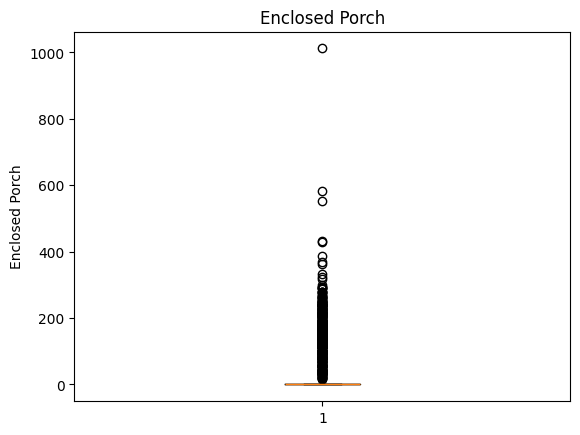

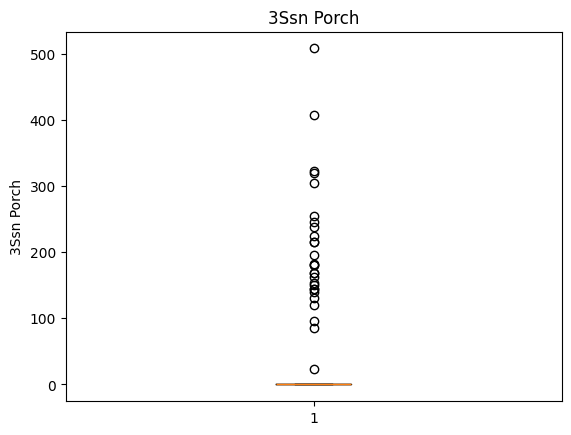

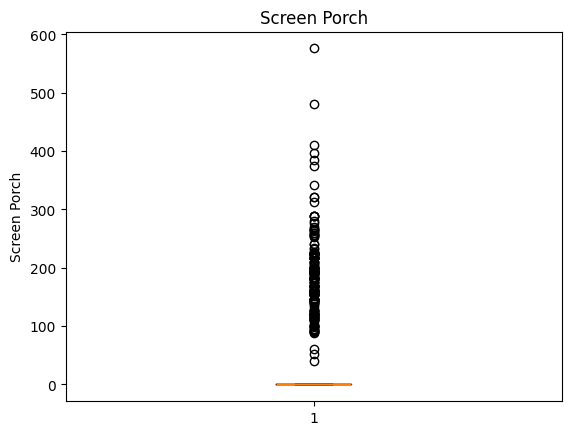

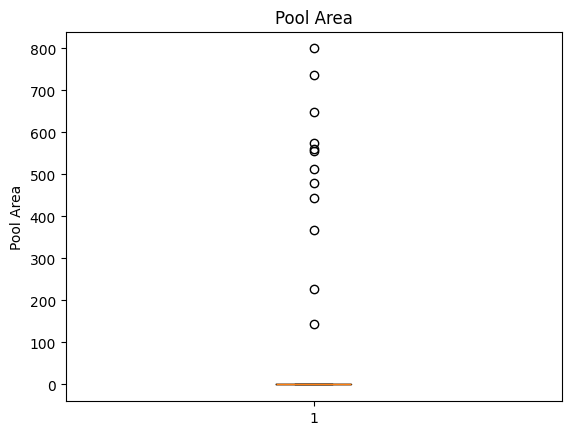

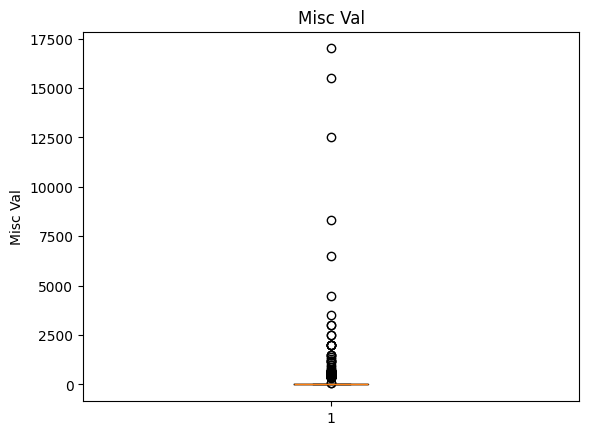

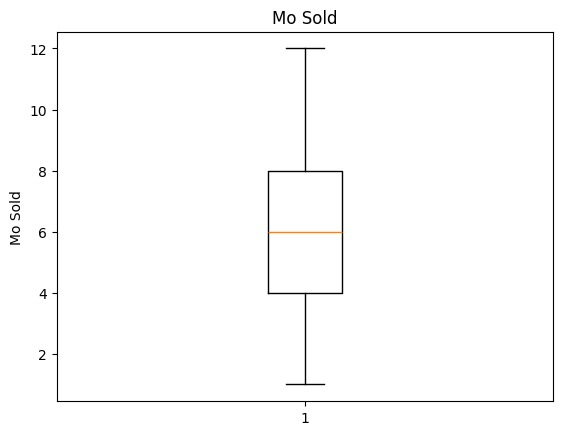

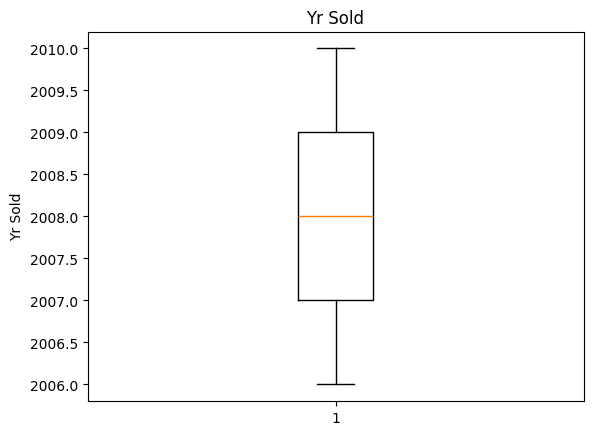

In [5]:
categoricas_con_numeros = [
    "MS SubClass",
    "Overall Qual",
    "Overall Cond",
]

numeric_cols = features.select_dtypes(include=[np.number]).columns
numeric_cols_reales = [c for c in numeric_cols if c not in categoricas_con_numeros]

for col in numeric_cols_reales:
    plt.figure()
    plt.boxplot(features[col].dropna().values, showfliers=True)
    plt.title(col)
    plt.ylabel(col)
    plt.show()


**Análisis de Outliers**

- Lot Frontage: presenta varios puntos atípicos, tenemos un dato con un área frente a la casa por encima de los 300 pies cuadrados, y varios que se posicionan por encima de de 130 pies cuadrados. Cabe mencionar que incluso hay outliers que están en cero.
- Lot Area: hay una alta presencia de valores atípicos para viviendas que tienen un tamaño de terreno muy por encima de los demás.
- Year Built: hay una ligera presencia de outliers, pero estos los encontramos para casas casas construidas previo a 1900.
- Year Remod/Add: no hay valores atípicos para esta variable.
- Mas Vnr Area: parece que hay pocas casas que cuentan con bastante área de mampostería, hay varios puntos atípicos que se encuentran por encima de los 400 pies cuadrados.
- BsmtFin SF 1: hay una leve presencia de valores atípicos para viviendas con un área principal de sótano considerablemente grande, con valores por encima de los 2000 pies cuadrados.
- BsmtFin SF 2: se evidencia que es peculiar que las viviendas cuenten con un área secundaria de sótano, analizando el diagrama de caja y bigote, parece que el hecho de contar con un valor distinto a cero ya se considera como algo muy diferente a la mayoría de las viviendas.
- Bsmt Unf SF: los outliers se encuentran en valores altos de área sin terminar para el sótano, estando por encima de 1600 pies cuadrados.
- Total Bsmt SF: para esta variable se considera como puntos atípicos, el hecho de no contar con sotáno, o tener un área arriba de los 2000 pies cuadrados.
- 1st Flr SF: hay varios puntos atípicos, todos estos se encuentran para áreas de primer nivel por encima de los 2000 pies cuadrados.
- 2nd Flr SF: se tiene baja presencia de outliers, pero estos los podemos identificar en casas que tienen más de 1700 pies cuadrados.
- Low Qual Fin SF: aquí se evidencia que el hecho de contar área de baja calidad en la vivienda es considerado como algo atípico entre las viviendas.
- Gr Liv Area: los outliers los identificamos en viviendas con un alto valor de área arriba de la tierra, estos se encuentran por encima de los 2600 pies cuadrados.
- Bsmt Full Bath: en este caso solamente tenemos un punto atípico, y se da con una vivienda que cuenta con tres baños completos en el sótano.
- Bsmt Half Bath: hay poca presencia de valores atípicos, la mayoría de viviendas tienen 0 baños a la mitad, y todas aquellas que tienen uno o dos baños de este estilo son outliers.
- Full Bath: para ser considerado como punto atípico se tiene que contar con 4 baños completos dentro de la casa.
- Half Bath: no hay presencia de valores atípicos, todas las viviendas están entre 0 y 2.
- Bedroom AbvGr: hay algunos puntos atípicos, estos los podemos encontrar en viviendas con 0 dormitorios dentro de la vivienda, o en aquellas que tienen más de cuatro.
- Kitchen AbvGr: los outliers los identificamos en viviendas que no tienen cocina, o que cuentan con más de una.
- TotRms AbvGr: los valores atípicos ocurrene n las viviendas que tienen más de 10 cuartos en la vivienda.
- Fireplaces: en cuanto a chimeneas, es anormal ver viviendas con más de 2.
- Garage Yr Blt: aquí notamos algo muy peculiar, ya que parece ser que existe una observación con un valor arriba del año 2200, esto es algo imposible, por lo que se tendrá que limpiar esto del dataset previo a hacer el split. Los demas outliers se encuentran antes de 1900.
- Garage Cars: las viviendas que tienen espacio para más de tres carros en el garage son valores atípicos para la variable.
- Garage Area: los valores atípicos se encuentran en áreas grandes de garage, en aquellas que tienen más de 900 pies cuadrados.
- Wood Deck SF: los outliers se encuentran en viviendas con área de cubierta de madera arriba de 400 pies cuadrados.
- Open Porch SF: tenemos varios valores atípicos, los podemos encontrar en viviendas con un porche abierto que tengan un área por encima de 150 pies cuadrados.
- Enclosed Porch: en este caso, los valores atípicos los vemos evidenciados en viviendas que tienen un porche cerrado, es decir, valor de área distinto de cero.
- 3Ssn Proch: se considera como outlier a los valores distintos de cero, en otras palabras, el hecho de contar con un porche de tres temporadas es algo inusual.
- Screen Porch: vamos que el hecho de contar con un porche de mosquitero es considerado como algo atípico.
- Pool Area: las viviendas con piscina son puntos atípicos, por lo que vemos que el hecho de tener un área distinta de cero es algo inusual.
- Misc Val: se presentan valores atípicos en aquellos puntos que cuentan con un valor para una característica adicional, es decir, ser mayor a 0 para esta variable.
- Mo Sold: no hay valores atípicos.
- Yr Sold: no se tienen valores atípicos.

### **Identificación de Posibles Correlaciones Relevantes**

In [6]:
numeric_features = features.select_dtypes(include=[np.number])

corr_target = numeric_features.corrwith(target).sort_values(key=lambda s: s.abs(), ascending=False)

pd.set_option("display.max_rows", None)
corr_df = corr_target.to_frame("corr_with_target")
corr_df

,corr_with_target
Overall Qual,0.795298
Gr Liv Area,0.698315
Garage Cars,0.644304
Garage Area,0.633106
Total Bsmt SF,0.612256
1st Flr SF,0.607433
Year Built,0.545409
Full Bath,0.542053
Year Remod/Add,0.517653
Garage Yr Blt,0.516211


## **Preprocesamiento**

### **Selección de Variables**

Hemos decidido descartar estas variables:

- Yr Sold: consideramos que no tiene mucha relevancia en el precio final de una casa, además, al analizar la correlación con la variable objetivo, vemos que esta es de -0.037686.
- Mo Sold: al igual que con el año no vemos que sea un factor importante al definir el precio de una casa, y con esta variable, también se evidencia una baja correlación con la variable objetivo, siendo de 0.030714.

### **Valores Faltantes**

Como se mostró previamente en la tabla, las variables que identificamos que tenían variables faltantes fueron:

- Lot Frontage
- Alley
- Mas Vnr Type
- Mas Vnr Area
- Bsmt Qual
- Bmst Cond
- Bmst Exposure
- BmstFin Type 1
- BsmtFin SF 1
- BsmtFin Type 2
- BsmtFin SF 2
- Bsmt Unf SF
- Total Bsmt SF
- Bsmt Full Bath
- Bsmt Half Bath
- Fireplace Qu
- Garage Type
- Garage Yr Blt
- Garage Finish
- Garage Cars
- Garage Area
- Garage Qual
- Garage Cond
- Pool QC
- Fence
- Misc Feature
- Misc Val

---

Tras analizar los datos, preferimos modificar estos valores para que no fueran vacíos, ya que consideramos que el hecho de tenerlo faltante puede ser algo influyente en el precio final de una casa. Por ejemplo, Pool QC, la calidad de una piscina, si es que se tiene puede impactar el valor de una vivienda, específicamente estos son los valores con los que relleneramos el dataset para las variables con valores faltantes:

| Variable               | Valor a Reemplazar | ¿Por qué?                                                                                                       |
| ---------------------- | ------------------ | --------------------------------------------------------------------------------------------------------------- |
| Lot Frontage           | 0                  | Si no hay espacio en la calle que conecta a la propiedad puede ser un factor decisivo para la compra.           |
| Alley                  | None               | Así representamos a los que no tengan acceso a la propiedad por callejón.                                       |
| Mas Vnr Type           | None               | Indicar que la vivienda no cuenta con mampostería.                                                              |
| Mas Vnr Area           | 0                  | No hay mapostería, entonces área es 0.                                                                          |
| Relacionadas al sótano | None, 0            | Las categóricas las dejaremos con None y las numéricas con 0, esto para indicar que no hay presencia de sótano. |
| Fireplace Qu           | None               | Mostrar que no hay chimenea en la vivienda.                                                                     |
| Relacionadas a garage  | None, 0            | Las categóricas las dejamos con None y las numéricas con 0, señalar que la vivienda no cuenta con garage.       |
| Pool QC                | None               | Señalar que no hay piscina.                                                                                     |
| Fence                  | None               | Denotar que no hay cerca.                                                                                       |
| Misc Feature           | None               | Indicar que no cuenta con características adicionales.                                                          |
| Misc Val               | 0                  | Al no tener contar con una característica adicional, su valor sería 0.      

---

El método utilizado para definir cómo íbamos a gestionar la ausencia de valores fue imputación basada en el signfiicado de NA acorde a la variable. En el dataset, las variables no están vacías por un error de medición, sino que representan la ausencia de una característica. Para las varaibles categóricas, colocamos None y 0 para las numéricas, con el objetivo de dejar explícito que no hay presencia de la característica. Este enfoque se eligió para mantener todas las observaciones, al considerar que incluso en los valores faltantes, esto puede agregar valor al modelo para el cálculo del precio de una vivienda.

### **Variables Categóricas**

El criterio que hemos utilizado para establecer el subtipo de las variables categóricas, fue analizar los posibles valores que se tomaban dentro del dataset, y dependiendo de si se podía establecer un orden lógico entre ellos, la clasificamos como ordinal, de lo contrario se dejaba como nominal. Por ejemplo, con Overall Qual, teníamos un número representando la calidad del material de la casa, o con Exter Qual, se tenían valores como Ex, Gd, TA, Fa y Po, los cuales podemos ordenar acorde a qué tan buena es la calidad del exterior. Para poder trabajar con el modelo de regresión, para las variables ordinales aplicaremos Ordinal Enconding, y para las nominales One-Hot Enconding. Específicamente esto es lo que se hará:

| **Variable**   | **Variables a Agregar**                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    |
| -------------- | ----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------- |
| MS SubClass    | MS_SubClass_020, MS_SubClass_030, MS_SubClass_040, MS_SubClass_045, MS_SubClass_050, MS_SubClass_060, MS_SubClass_070, MS_SubClass_075, MS_SubClass_080, MS_SubClass_085, MS_SubClass_090, MS_SubClass_120, MS_SubClass_150, MS_SubClass_160, MS_SubClass_180, MS_SubClass_190                                                                                                                                                                                                                                                                              |
| MS Zoning      | Zoning_A, Zoning_C, Zoning_FV, Zoning_I, Zoning_RH, Zoning_RL, Zoning_RP, Zoning_RM                                                                                                                                                                                                                                                                                                                                                                                                                                                                         |
| Street         | Street_Grvl, Street_Pave                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    |
| Alley          | Alley_Grvl, Alley_Pave, Alley_None                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          |
| Land Contour   | LandContour_Bnk, LandContour_HLS, LandContour_Low, LandContour_Lvl                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          |
| Utilities      | Utilities_AllPub, Utilities_NoSeWa, Utilities_NoSewr, Utilities_ELO                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         |
| Lot Config     | LotConfig_Corner, LotConfig_CulDSac, LotConfig_FR2, LotConfig_FR3, LotConfig_Inside                                                                                                                                                                                                                                                                                                                                                                                                                                                                         |
| Neighborhood   | Neighborhood_Blmngtn, Neighborhood_Blueste, Neighborhood_BrDale, Neighborhood_BrkSide, Neighborhood_ClearCr, Neighborhood_CollgCr, Neighborhood_Crawfor, Neighborhood_Edwards, Neighborhood_Gilbert, Neighborhood_IDOTRR, Neighborhood_MeadowV, Neighborhood_Mitchel, Neighborhood_NAmes, Neighborhood_NoRidge, Neighborhood_NPkVill, Neighborhood_NridgHt, Neighborhood_NWAmes, Neighborhood_OldTown, Neighborhood_Sawyer, Neighborhood_SawyerW, Neighborhood_Somerst, Neighborhood_StoneBr, Neighborhood_SWISU, Neighborhood_Timber, Neighborhood_Veenker |
| Condition 1    | Condition1_Artery, Condition1_Feedr, Condition1_Norm, Condition1_RRNn, Condition1_RRAn, Condition1_PosN, Condition1_PosA, Condition1_RRNe, Condition1_RRAe                                                                                                                                                                                                                                                                                                                                                                                                  |
| Condition 2    | Condition2_Artery, Condition2_Feedr, Condition2_Norm, Condition2_RRNn, Condition2_RRAn, Condition2_PosN, Condition2_PosA, Condition2_RRNe, Condition2_RRAe                                                                                                                                                                                                                                                                                                                                                                                                  |
| Bldg Type      | BldgType_1Fam, BldgType_2FmCon, BldgType_Duplex, BldgType_TwnhsE, BldgType_Twnhs                                                                                                                                                                                                                                                                                                                                                                                                                                                                            |
| House Style    | HouseStyle_1Story, HouseStyle_1.5Fin, HouseStyle_1.5Unf, HouseStyle_2Story, HouseStyle_2.5Fin, HouseStyle_2.5Unf, HouseStyle_SFoyer, HouseStyle_SLvl                                                                                                                                                                                                                                                                                                                                                                                                        |
| Roof Style     | RoofStyle_Flat, RoofStyle_Gable, RoofStyle_Gambrel, RoofStyle_Hip, RoofStyle_Mansard, RoofStyle_Shed                                                                                                                                                                                                                                                                                                                                                                                                                                                        |
| Roof Matl      | RoofMatl_ClyTile, RoofMatl_CompShg, RoofMatl_Membran, RoofMatl_Metal, RoofMatl_Roll, RoofMatl_Tar&Grv, RoofMatl_WdShake, RoofMatl_WdShngl                                                                                                                                                                                                                                                                                                                                                                                                                   |
| Exterior 1st   | Exterior1_AsbShng, Exterior1_AsphShn, Exterior1_BrkComm, Exterior1_BrkFace, Exterior1_CBlock, Exterior1_CemntBd, Exterior1_HdBoard, Exterior1_ImStucc, Exterior1_MetalSd, Exterior1_Other, Exterior1_Plywood, Exterior1_PreCast, Exterior1_Stone, Exterior1_Stucco, Exterior1_VinylSd, Exterior1_WdSdng, Exterior1_WdShing                                                                                                                                                                                                                                  |
| Exterior 2nd   | Exterior2_AsbShng, Exterior2_AsphShn, Exterior2_BrkComm, Exterior2_BrkFace, Exterior2_CBlock, Exterior2_CemntBd, Exterior2_HdBoard, Exterior2_ImStucc, Exterior2_MetalSd, Exterior2_Other, Exterior2_Plywood, Exterior2_PreCast, Exterior2_Stone, Exterior2_Stucco, Exterior2_VinylSd, Exterior2_WdSdng, Exterior2_WdShing                                                                                                                                                                                                                                  |
| Mas Vnr Type   | MasVnrType_BrkCmn, MasVnrType_BrkFace, MasVnrType_CBlock, MasVnrType_Stone, MasVnrType_None                                                                                                                                                                                                                                                                                                                                                                                                                                                                 |
| Foundation     | Foundation_BrkTil, Foundation_CBlock, Foundation_PConc, Foundation_Slab, Foundation_Stone, Foundation_Wood                                                                                                                                                                                                                                                                                                                                                                                                                                                  |
| Heating        | Heating_Floor, Heating_GasA, Heating_GasW, Heating_Grav, Heating_OthW, Heating_Wall                                                                                                                                                                                                                                                                                                                                                                                                                                                                         |
| Central Air    | CentralAir_N, CentralAir_Y                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  |
| Electrical     | Electrical_FuseA, Electrical_FuseF, Electrical_FuseP, Electrical_Mix, Electrical_SBrkr                                                                                                                                                                                                                                                                                                                                                                                                                                                                      |
| BsmtFin Type 1 | BsmtFinType1_GLQ, BsmtFinType1_ALQ, BsmtFinType1_BLQ, BsmtFinType1_Rec, BsmtFinType1_LwQ, BsmtFinType1_Unf, BsmtFinType1_None                                                                                                                                                                                                                                                                                                                                                                                                                               |
| BsmtFin Type 2 | BsmtFinType2_GLQ, BsmtFinType2_ALQ, BsmtFinType2_BLQ, BsmtFinType2_Rec, BsmtFinType2_LwQ, BsmtFinType2_Unf, BsmtFinType2_None                                                                                                                                                                                                                                                                                                                                                                                                                               |
| Garage Type    | GarageType_2Types, GarageType_Attchd, GarageType_Basment, GarageType_BuiltIn, GarageType_CarPort, GarageType_Detchd, GarageType_None                                                                                                                                                                                                                                                                                                                                                                                                                        |
| Misc Feature   | MiscFeature_Elev, MiscFeature_Gar2, MiscFeature_Othr, MiscFeature_Shed, MiscFeature_TenC, MiscFeature_None                                                                                                                                                                                                                                                                                                                                                                                                                                                  |
| Sale Type      | SaleType_WD, SaleType_CWD, SaleType_VWD, SaleType_New, SaleType_COD, SaleType_Con, SaleType_ConLw, SaleType_ConLI, SaleType_ConLD, SaleType_Oth                                                                                                                                                                                                                                                                                                                                                                                                             |
| Sale Condition | SaleCondition_Normal, SaleCondition_Abnorml, SaleCondition_AdjLand, SaleCondition_Alloca, SaleCondition_Family, SaleCondition_Partial                                                                                                                                                                                                                                                                                                                                                                                                                       |

---

| **Variable**  | **Escala**                                                 |
| ------------- | ---------------------------------------------------------- |
| Lot Shape     | Reg=4, IR1=3, IR2=2, IR3=1                                 |
| Land Slope    | Sev=3, Mod=2, Gtl=1                                        |
| Overall Qual  | Ya se encuentra por número.                                |
| Overall Cond  | Ya se encuentra por número.                                |
| Exter Qual    | Ex=5, Gd=4, TA=3, Fa=2, Po=1                               |
| Exter Cond    | Ex=5, Gd=4, TA=3, Fa=2, Po=1                               |
| Bsmt Qual     | Ex=5, Gd=4, TA=3, Fa=2, Po=1, None=0                       |
| Bsmt Cond     | Ex=5, Gd=4, TA=3, Fa=2, Po=1, None=0                       |
| Bsmt Exposure | Gd=4, Av=3, Mn=2, No=1, None=0                             |
| Heating QC     | Ex=5, Gd=4, TA=3, Fa=2, Po=1                               |
| Kitchen Qual   | Ex=5, Gd=4, TA=3, Fa=2, Po=1                               |
| Functional    | Sal=8, Sev=7, Maj2=6, Maj1=5, Mod=4, Min2=3, Min1=2, Typ=1 |
| Fireplace Qu   | Ex=5, Gd=4, TA=3, Fa=2, Po=1, None=0                       |
| Garage Finish | Fin=3, RFn=2, Unf=1, None=0                                |
| Garage Qual   | Ex=5, Gd=4, TA=3, Fa=2, Po=1, None=0                       |
| Garage Cond   | Ex=5, Gd=4, TA=3, Fa=2, Po=1, None=0                       |
| Paved Drive   | Y=3, P=2, N=1                                              |
| Pool QC       | Ex=4, Gd=3, TA=2, Fa=1, None=0                             |
| Fence         | GdPrv=4, MnPrv=3, GdWo=2, MnWw=1, None=0                   |

---

### **Escalamiento**

Hemos decidido probar con los siguientes modelos:

- Decision Tree
- Random Forest
- XGBoost

Ninguno de estos requiere escalado o normalización de datos.

## **Separación de Datos**

In [7]:
# Pipeline para preparar dataset previo a split
#Columnas que eliminaremos
DROP_COLS = ["Yr Sold", "Mo Sold"]

# Variables a imputar, NA -> 0, NA -> None
NUM_IMPUTE_ZERO = [
    "Lot Frontage",
    "Mas Vnr Area",
    "BsmtFin SF 1",
    "BsmtFin SF 2",
    "Bsmt Unf SF",
    "Total Bsmt SF",
    "Bsmt Full Bath",
    "Bsmt Half Bath",
    "Garage Yr Blt",
    "Garage Cars",
    "Garage Area",
    "Misc Val",
]

CAT_IMPUTE_NONE = [
    "Alley",
    "Mas Vnr Type",
    "Bsmt Qual",
    "Bsmt Cond",
    "Bsmt Exposure",
    "BsmtFin Type 1",
    "BsmtFin Type 2",
    "Fireplace Qu",
    "Garage Type",
    "Garage Finish",
    "Garage Qual",
    "Garage Cond",
    "Pool QC",
    "Fence",
    "Misc Feature",
]

class CustomImputer(BaseEstimator, TransformerMixin):
    def __init__(self, num_cols, cat_cols):
        self.num_cols = num_cols
        self.cat_cols = cat_cols

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X = X.copy()

        for c in self.num_cols:
            if c in X.columns:
                X[c] = X[c].fillna(0)

        for c in self.cat_cols:
            if c in X.columns:
                X[c] = X[c].astype("object").fillna("None")

        return X

# Encoding
ORDINAL_COLS = [
    "Lot Shape",
    "Land Slope",
    "Exter Qual",
    "Exter Cond",
    "Bsmt Qual",
    "Bsmt Cond",
    "Bsmt Exposure",
    "Heating QC",      
    "Kitchen Qual",
    "Functional",
    "Fireplace Qu",
    "Garage Finish",
    "Garage Qual",
    "Garage Cond",
    "Paved Drive",
    "Pool QC",
    "Fence",
]

# orden de posibles valores de menor a myor
ordinal_categories = [
    ["IR3", "IR2", "IR1", "Reg"],
    ["Gtl", "Mod", "Sev"],                         
    ["Po", "Fa", "TA", "Gd", "Ex"],                
    ["Po", "Fa", "TA", "Gd", "Ex"],                
    ["None", "Po", "Fa", "TA", "Gd", "Ex"],        
    ["None", "Po", "Fa", "TA", "Gd", "Ex"],        
    ["None", "No", "Mn", "Av", "Gd"],              
    ["Po", "Fa", "TA", "Gd", "Ex"],                
    ["Po", "Fa", "TA", "Gd", "Ex"],                
    ["Typ", "Min1", "Min2", "Mod", "Maj1", "Maj2", "Sev", "Sal"],
    ["None", "Po", "Fa", "TA", "Gd", "Ex"],        
    ["None", "Unf", "RFn", "Fin"],                 
    ["None", "Po", "Fa", "TA", "Gd", "Ex"],        
    ["None", "Po", "Fa", "TA", "Gd", "Ex"],        
    ["N", "P", "Y"],                               
    ["None", "Fa", "TA", "Gd", "Ex"],              
    ["None", "MnWw", "GdWo", "MnPrv", "GdPrv"],
]

ordinal_encoder = OrdinalEncoder(
    categories=ordinal_categories,
    handle_unknown="use_encoded_value",
    unknown_value=-1
)

NOMINAL_COLS = [
    "MS SubClass",
    "MS Zoning",
    "Street",
    "Alley",
    "Land Contour",
    "Utilities",
    "Lot Config",
    "Neighborhood",
    "Condition 1",
    "Condition 2",
    "Bldg Type",
    "House Style",
    "Roof Style",
    "Roof Matl",
    "Exterior 1st",
    "Exterior 2nd",
    "Mas Vnr Type",
    "Foundation",
    "Heating",
    "Central Air",
    "Electrical",
    "BsmtFin Type 1",
    "BsmtFin Type 2",
    "Garage Type",
    "Misc Feature",
    "Sale Type",
    "Sale Condition",
]

#solo para desplegar nuevas "variables" como 020, 030
class MSSubClassFormatter(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        X = X.copy()
        if "MS SubClass" in X.columns:
            X["MS SubClass"] = X["MS SubClass"].apply(lambda v: f"{int(v):03d}" if pd.notna(v) else "None")
        return X

one_hot = OneHotEncoder(
    handle_unknown="ignore",
    sparse_output=False
)

preprocessor = ColumnTransformer(
    transformers=[
        ("ord", ordinal_encoder, ORDINAL_COLS),
        ("ohe", one_hot, NOMINAL_COLS),
    ],
    remainder="passthrough",
    verbose_feature_names_out=False
)

pipeline = Pipeline(steps=[
    ("drop_cols",  FunctionTransformer(lambda df: df.drop(columns=[c for c in DROP_COLS if c in df.columns]), validate=False)),
    ("impute",     CustomImputer(num_cols=NUM_IMPUTE_ZERO, cat_cols=CAT_IMPUTE_NONE)),
    ("msclass_fmt", MSSubClassFormatter()),
    ("encode",     preprocessor),
])

# Eliminar observación imposible identificada en etapa de EDA
mask = features["Garage Yr Blt"].ne(2207)
features = features.loc[mask].copy()
target = target.loc[features.index].copy()

X_train_raw, X_validation_raw, y_train, y_validation = train_test_split(
    features,
    target,
    test_size=0.20,
    random_state=56
)

X_train_processed = pipeline.fit_transform(X_train_raw)
X_validation_processed = pipeline.transform(X_validation_raw)

feature_names = pipeline.named_steps["encode"].get_feature_names_out()

X_train = pd.DataFrame(X_train_processed, columns=feature_names)
X_validation = pd.DataFrame(X_validation_processed, columns=feature_names)


## **Entrenamiento y Comparación de Modelos**

### **Breve Descripción de Modelos a Utilizar**

- Árbol de Decisión: se genera un árbol en donde en cada nodo tomamos una decisión en base a preguntas planteadas sobre los valores de las variables, de esta forma se van dividiendo los datos hasta llegar a una hoja de predicción. Para presentar una predicción final se promedian los valores objetivo de todas las observaciones que cayeron en la hoja.
- Random Forest: se generan varios árboles de decisión, a cada uno se le da una proporción distinta del dataset, incluso variables distintas con las que trabajar. De esta forma conseguimos que los árboles sean diferentes entre sí. Al final, se obtiene el promedio de predicciones, y con esto se obtiene el posible valor para la variable objetivo.
- XGBoost: se trabaja con árboles de decisión, pero la forma de trabajar del modelo, es que va generando árboles de forma secuencial. Es decir, por medio del primer árbol de decisión buscamos obtener una primera predicción para la variable objetivo, se contrasta contra el valor esperado, y en base a esto, se espera que el siguiente árbol trate de reducir el gradiente de error, y así sucesivamente con cada árbol. En pocas palabras, con cada árbol buscamos corregir los errores que el modelo tenga acumulados, para que al final se tenga un valor cercano al de la etiqueta.

In [ ]:
#Modelos Default
# Árbol de decisión
dt = DecisionTreeRegressor(random_state=56)
dt.fit(X_train, y_train)

# Random Forest
rf = RandomForestRegressor(random_state=56)
rf.fit(X_train, y_train)

# XGBoost
xgb = XGBRegressor(
    random_state=56,
    objective="reg:squarederror"
)
xgb.fit(X_train, y_train)

def evaluate_model(model, X_eval, y_eval):
    y_pred = model.predict(X_eval)
    mae = mean_absolute_error(y_eval, y_pred)
    mse = mean_squared_error(y_eval, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_eval, y_pred)
    return mae, mse, rmse, r2

mae_dt, mse_dt, rmse_dt, r2_dt = evaluate_model(dt, X_validation, y_validation)
mae_rf, mse_rf, rmse_rf, r2_rf = evaluate_model(rf, X_validation, y_validation)
mae_xgb, mse_xgb, rmse_xgb, r2_xgb = evaluate_model(xgb, X_validation, y_validation)

results = pd.DataFrame({
    "Modelo": ["Árbol de Decisión", "Random Forest", "XGBoost"],
    "MAE": [mae_dt, mae_rf, mae_xgb],
    "MSE": [mse_dt, mse_rf, mse_xgb],
    "RMSE": [rmse_dt, rmse_rf, rmse_xgb],
    "R2": [r2_dt, r2_rf, r2_xgb],
}).sort_values(by="MSE", ascending=True)

results

### **Hipérparametros para Árbol de Decisión**

- max_depth: controla cuántos niveles de preguntas puede hacer antes de dar una predicción.
- min_samples_split: número mínimo de observaciones que debe tener un nodo para que se pueda dividir en dos. Si un nodo tiene menos observaciones que este valor, se convierte en hoja.
- min_samples_leaf: número mínimo de observaciones que debe tener una hoja al final del árbol.
- max_features: proporción de variables que el árbol toma en cuenta para hacer preguntas.
- ccp_alpha: controla la complejidad del árbol. 
- splitter: estrategia para la división en cada nodo acorde a variables.

In [ ]:
param_grid = {
    "max_depth": [11,12,13,14],
    "min_samples_split": [9,10,11,12,13,15,18],
    "min_samples_leaf": [1],
    "max_features": [0.5],
    "ccp_alpha": [0.0],
    "splitter": ["best"],
}

grid_dt = GridSearchCV(
    estimator=dt,
    param_grid=param_grid,
    scoring="neg_mean_squared_error",
    cv=5,
    n_jobs=-1,
    verbose=1,
)

grid_dt.fit(X_train, y_train)

print("Mejores hiperparámetros:", grid_dt.best_params_)
print("Mejor MSE CV:", -grid_dt.best_score_)

best_dt = grid_dt.best_estimator_
y_pred_val = best_dt.predict(X_validation)
mse_val = mean_squared_error(y_validation, y_pred_val)

print("MSE en validation:", mse_val)

Para tratar de encontrar los mejores hipérparametros, se decidió probar con un amplio rango de posibles valores, en este caso comenzamos con este param_grid:

```python
param_grid = {
    "max_depth": [11,12,13,14],
    "min_samples_split": [9,10,11,12,13,15,18],
    "min_samples_leaf": [1],
    "max_features": [0.5],
    "ccp_alpha": [0.0],
    "splitter": ["best"],
}
```

La mejor combinación de hiperparámetros encontrada fue:

```python
{'ccp_alpha': 0.0, 'max_depth': 13, 'max_features': 0.5, 'min_samples_leaf': 1, 'min_samples_split': 15, 'splitter': 'best'}
```

### **Hipérparametros para Random Forest**

- n_estimators: cantidad de árboles a generar.
- max_depth: controla cuántos niveles de preguntas puede hacer antes de dar una predicción.
- min_samples_split: número mínimo de observaciones que debe tener un nodo para que se pueda dividir en dos. Si un nodo tiene menos observaciones que este valor, se convierte en hoja.
- min_samples_leaf: número mínimo de observaciones que debe tener una hoja al final del árbol.
- max_features: proporción de variables que el árbol toma en cuenta para hacer preguntas.
- bootstrap: controla si cada árbol se entrena con una muestra del dataset tomada con reemplazo, lo que significa que una misma observación puede aparecer más de una vez en el entrenamiento de un árbol.
- max_samples: número máximo de observaciones que se tomarán para entrenar cada árbol (puede ser proporción)

In [ ]:
param_grid_rf = {
    "n_estimators": [800, 900, 1000],
    "max_depth": [16, 18, 20, 22],
    "min_samples_split": [2, 3, 4],
    "min_samples_leaf": [1, 2],
    "max_features": [0.40, 0.45, 0.50, "sqrt"],
    "bootstrap": [True],
    "max_samples": [0.85, 0.90, 0.95],
}

grid_rf = GridSearchCV(
    estimator=rf,
    param_grid=param_grid_rf,
    scoring="neg_mean_squared_error",
    cv=3,
    n_jobs=-1,
    verbose=1,
)

grid_rf.fit(X_train, y_train)

print("Mejores hiperparámetros RF:", grid_rf.best_params_)
print("Mejor MSE CV:", -grid_rf.best_score_)

best_rf = grid_rf.best_estimator_
y_pred_val = best_rf.predict(X_validation)
mse_val = mean_squared_error(y_validation, y_pred_val)
print("MSE en validation:", mse_val)

Igual que antes, optamos por utilizar un amplio rango de valores para el param_grid:

```python
param_grid_rf = {
    "n_estimators": [800, 900, 1000],
    "max_depth": [16, 18, 20, 22],
    "min_samples_split": [2, 3, 4],
    "min_samples_leaf": [1, 2],
    "max_features": [0.40, 0.45, 0.50, "sqrt"],
    "bootstrap": [True],
    "max_samples": [0.85, 0.90, 0.95],
}
```

La mejor combinación de hiperparámetros fue con:

```python
{'bootstrap': True, 'max_depth': 20, 'max_features': 0.45, 'max_samples': 0.95, 'min_samples_leaf': 1, 'min_samples_split': 3, 'n_estimators': 800}
```

### **Hipérparametros para XGBoost**

- n_estimators: número de árboles que se entrenarán.
- learning_rate: tasa de aprendizaje para cada árbol, es decir, esto impacta qué tanto aporta cada árbol nuevo a la predicción acumulada.
- max_depth: controla cuántos niveles de preguntas puede hacer antes de dar una predicción.
- subsample: controla cuántas observaciones se tomarán para entrenar cada árbol.
- colsample_bytree: controla cuántas variables se tomarán para entrenar cada árbol.
- reg_lambda: regularización L2, penaliza valores grandes en las hojas de cada árbol buscando reducir sobreajuste.

In [ ]:
param_grid_xgb = {
    "n_estimators": [900, 1000, 1100],
    "learning_rate": [0.04, 0.05, 0.06],
    "max_depth": [3, 4, 5],
    "subsample": [0.6, 0.65, 0.7],
    "colsample_bytree": [0.8, 0.85, 0.9],
    "reg_lambda": [0.5, 1, 2],
}

grid_xgb = GridSearchCV(
    estimator=xgb,
    param_grid=param_grid_xgb,
    scoring="neg_mean_squared_error",
    cv=5,
    n_jobs=-1,
    verbose=1,
)

grid_xgb.fit(X_train, y_train)

print("Mejores hiperparámetros XGB:", grid_xgb.best_params_)
print("Mejor MSE CV:", -grid_xgb.best_score_)

best_xgb = grid_xgb.best_estimator_
y_pred_val = best_xgb.predict(X_validation)
mse_val = mean_squared_error(y_validation, y_pred_val)
print("MSE en validation:", mse_val)

Empezamos definiendo los siguientes parámetros de prueba:

```python
param_grid_xgb = {
    "n_estimators": [900, 1000, 1100],
    "learning_rate": [0.04, 0.05, 0.06],
    "max_depth": [3, 4, 5],
    "subsample": [0.6, 0.65, 0.7],
    "colsample_bytree": [0.8, 0.85, 0.9],
    "reg_lambda": [0.5, 1, 2],
}
```

Estos fueron los mejores hipérparametros:

```python
{'colsample_bytree': 0.85, 'learning_rate': 0.05, 'max_depth': 4, 'n_estimators': 1000, 'reg_lambda': 0.5, 'subsample': 0.7}
```

## **Evaluación de Modelos**

In [ ]:
def evaluate_model(model, X, y):
    y_pred = model.predict(X)
    mae = mean_absolute_error(y, y_pred)
    mse = mean_squared_error(y, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y, y_pred)
    return mae, mse, rmse, r2

#Comparación contra entrenamiento
mae_dt, mse_dt, rmse_dt, r2_dt = evaluate_model(best_dt, X_train, y_train)
mae_rf, mse_rf, rmse_rf, r2_rf = evaluate_model(best_rf, X_train, y_train)
mae_xgb, mse_xgb, rmse_xgb, r2_xgb = evaluate_model(best_xgb, X_train, y_train)
print("Métricas con data de entrenamiento")
results_train = pd.DataFrame({
    "Modelo": ["Decision Tree", "Random Forest", "XGBoost"],
    "MAE": [mae_dt, mae_rf, mae_xgb],
    "MSE": [mse_dt, mse_rf, mse_xgb],
    "RMSE": [rmse_dt, rmse_rf, rmse_xgb],
    "R2": [r2_dt, r2_rf, r2_xgb],
}).sort_values(by="MSE", ascending=True).reset_index(drop=True)

results_train

In [ ]:
# Comparación contra validation
mae_dt, mse_dt, rmse_dt, r2_dt = evaluate_model(best_dt, X_validation, y_validation)
mae_rf, mse_rf, rmse_rf, r2_rf = evaluate_model(best_rf, X_validation, y_validation)
mae_xgb, mse_xgb, rmse_xgb, r2_xgb = evaluate_model(best_xgb, X_validation, y_validation)
print("Métricas de validación")
results_validation = pd.DataFrame({
    "Modelo": ["Decision Tree", "Random Forest", "XGBoost"],
    "MAE": [mae_dt, mae_rf, mae_xgb],
    "MSE": [mse_dt, mse_rf, mse_xgb],
    "RMSE": [rmse_dt, rmse_rf, rmse_xgb],
    "R2": [r2_dt, r2_rf, r2_xgb],
}).sort_values(by="MSE", ascending=True).reset_index(drop=True)

results_validation

Tras comparar los modelos, se evidencia que hay sobreajuste en los tres, algo que queremos evitar a toda costa en nuestros modelos, ya que está memorizando datos, en vez de ser capaz de generalizar bien que es el objetivo al entrenar modelos. Dicho esto, haremos una segunda ronda de ajustes sobre los hiperparámetros.

In [ ]:
param_grid_dt = {
    "max_depth": [4, 5, 6, 7, 8],
    "min_samples_split": [20, 30, 50, 80],
    "min_samples_leaf": [10, 20, 30, 50],
    "max_features": [0.4, 0.5, "sqrt"],
    "ccp_alpha": [1e-4, 1e-3, 5e-3, 1e-2],
    "splitter": ["best"],
}

grid_dt = GridSearchCV(
    DecisionTreeRegressor(random_state=42),
    param_grid_dt,
    cv=5,
    scoring="neg_root_mean_squared_error",
    refit=True,
    n_jobs=-1,
    verbose=1,
)

grid_dt.fit(X_train, y_train)
best_dt = grid_dt.best_estimator_

print("Mejores hiperparámetros DT:", grid_dt.best_params_)
print(f"RMSE CV (train): {-grid_dt.best_score_:,.2f}")
print(f"RMSE Validación: {np.sqrt(mean_squared_error(y_validation, best_dt.predict(X_validation))):,.2f}")
print(f"R² CV (train): {r2_score(y_train, best_dt.predict(X_train)):.4f}")
print(f"R² Validación: {r2_score(y_validation, best_dt.predict(X_validation)):.4f}")

In [ ]:
param_grid_rf = {
    "n_estimators": [300, 500, 800],
    "max_depth": [8, 10, 12, 15],
    "min_samples_split": [10, 20, 30],
    "min_samples_leaf": [4, 8, 16],
    "max_features": ["sqrt", 0.3, 0.4],
    "bootstrap": [True],
    "max_samples": [0.7, 0.8],
}

grid_rf = GridSearchCV(
    RandomForestRegressor(random_state=42),
    param_grid_rf,
    cv=5,
    scoring="neg_root_mean_squared_error",
    refit=True,
    n_jobs=-1,
    verbose=1,
)

grid_rf.fit(X_train, y_train)
best_rf = grid_rf.best_estimator_

print("Mejores hiperparámetros RF:", grid_rf.best_params_)
print(f"RMSE CV (train): {-grid_rf.best_score_:,.2f}")
print(f"RMSE Validación: {np.sqrt(mean_squared_error(y_validation, best_rf.predict(X_validation))):,.2f}")
print(f"R² CV (train): {r2_score(y_train, best_rf.predict(X_train)):.4f}")
print(f"R² Validación: {r2_score(y_validation, best_rf.predict(X_validation)):.4f}")

In [ ]:
param_grid_xgb = {
    "n_estimators": [500, 800, 1000],
    "learning_rate": [0.01, 0.03, 0.05],
    "max_depth": [2, 3, 4],
    "subsample": [0.6, 0.7],
    "colsample_bytree": [0.7, 0.8],
    "reg_lambda": [2, 5, 10],
    "reg_alpha": [0, 0.1, 0.5, 1],
    "min_child_weight": [5, 10, 20],
}

grid_xgb = GridSearchCV(
    XGBRegressor(random_state=42, tree_method="hist"),
    param_grid_xgb,
    cv=5,
    scoring="neg_root_mean_squared_error",
    refit=True,
    n_jobs=-1,
    verbose=1,
)

grid_xgb.fit(X_train, y_train)
best_xgb = grid_xgb.best_estimator_

print("Mejores hiperparámetros XGB:", grid_xgb.best_params_)
print(f"RMSE CV (train): {-grid_xgb.best_score_:,.2f}")
print(f"RMSE Validación: {np.sqrt(mean_squared_error(y_validation, best_xgb.predict(X_validation))):,.2f}")
print(f"R² CV (train): {r2_score(y_train, best_xgb.predict(X_train)):.4f}")
print(f"R² Validación: {r2_score(y_validation, best_xgb.predict(X_validation)):.4f}")

In [ ]:
models = {
    "Decision Tree": best_dt,
    "Random Forest": best_rf,
    "XGBoost": best_xgb,
}

rows = []
for name, model in models.items():
    r2_tr = r2_score(y_train, model.predict(X_train))
    r2_val = r2_score(y_validation, model.predict(X_validation))
    rmse_tr = np.sqrt(mean_squared_error(y_train, model.predict(X_train)))
    rmse_val = np.sqrt(mean_squared_error(y_validation, model.predict(X_validation)))
    rows.append({
        "Modelo": name,
        "R2 Train": round(r2_tr, 4),
        "R2 Val": round(r2_val, 4),
        "Gap R2": round(r2_tr - r2_val, 4),
        "RMSE Train": round(rmse_tr, 2),
        "RMSE Val": round(rmse_val, 2),
    })

pd.DataFrame(rows).sort_values("R2 Val", ascending=False).reset_index(drop=True)

Para establecer la selección de un modelo he decidido enfocarme en dos factores: diferencia más baja entre el coeficiente de determinación encontrado a partir de la data de entrenamiento contra el coeficiente de determinación encontrado a partir de la data de validación, y el que tuviera el valor más alto de coeficiente de determinación y el valor más bajo de RMSE con la data de validación. El objetivo principal era quedarnos con el modelo que presentara un balance entre ambos criterios priorizando que el modelo generalice bien sin sacrificar rendimiento predictivo. Bajo esta valoración, XGBoost fue el modelo seleccionado. Hay un gap entre los coeficientes de determinación de tan solo 0.055, y su RMSE tanto en la data de entrenamiento como en la data de validación fue menor que el de los demás modelos.

## **Persistencia del Modelo**

In [ ]:
with open("best_model.pkl", "wb") as f:
    pickle.dump(best_xgb, f)

print("Modelo guardado.")

## **Prueba de Modelo en Presentación**

In [8]:
with open("best_model.pkl", "rb") as f:
    modelo = pickle.load(f)

test_raw = pd.read_csv("test_features.csv")

X_test_processed = pipeline.transform(test_raw)

X_test = pd.DataFrame(X_test_processed, columns=feature_names)

predicciones = modelo.predict(X_test)

output = pd.DataFrame({"SalePrice": predicciones})
output.to_csv("predicciones.csv", index=False)

print(f"Predicciones generadas: {len(output)} filas")

Predicciones generadas: 19 filas
